<a href="https://colab.research.google.com/github/sureshmecad/Google-Colab/blob/master/2_Outliers_basic2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import scipy.stats as stats
from sklearn.datasets import load_boston

In [12]:
boston = load_boston()

In [14]:
print(boston.keys())

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])


- **data:** contains the information for various houses
- **target:** prices of the house
- **feature_names:** names of the features
- **DESCR:** describes the dataset

In [13]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [15]:
boston = pd.DataFrame(boston.data, columns=boston.feature_names)
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [17]:
print(boston.shape)

(506, 13)


In [16]:
print(boston.data.shape)

(506, 13)


- We can see that the target value MEDV is missing from the data. We create a new column of target values and add it to the dataframe.

boston['MEDV'] = boston.target

In [3]:
def get_dist(df, col):
  plt.figure(figsize=(18,6))

  plt.subplot(1,3,1)
  plt.hist(df[col], bins=30)
  plt.title('Hist')

  plt.subplot(1,3,2)
  stats.probplot(df[col], dist='norm', plot=plt)
  plt.ylabel('quantiles')

  plt.subplot(1,3,3)
  sns.boxplot(y=df[col])
  plt.title('Boxplot')

  plt.show()  

#### **Normal Distribution (Outliers)**

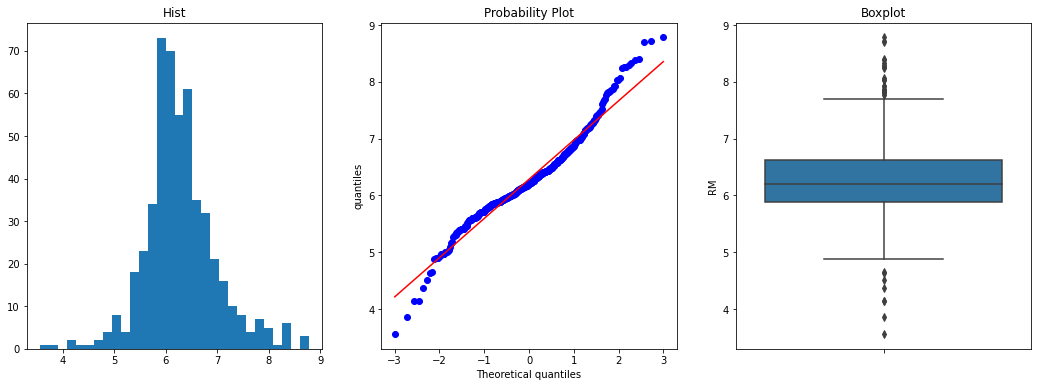

In [19]:
get_dist(boston, 'RM')

#### **Right Skewed (Outliers)**

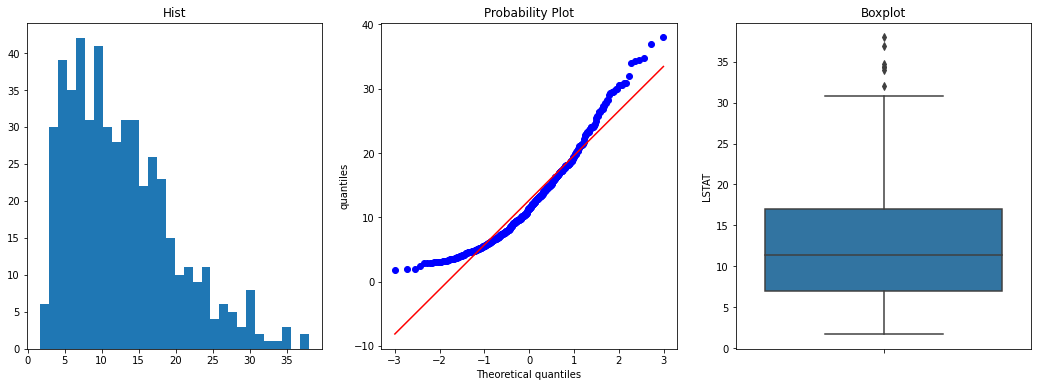

In [20]:
get_dist(boston, 'LSTAT')

#### **Heavily Right Skewed (Outliers)**

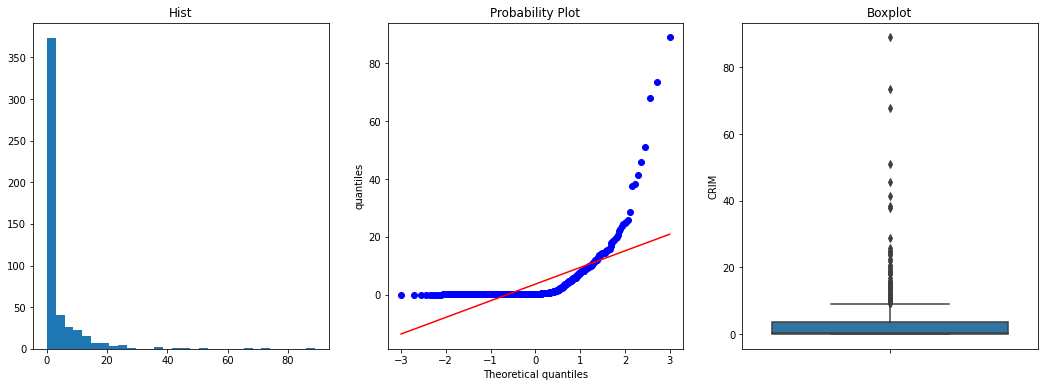

In [21]:
get_dist(boston, 'CRIM')

### **Outlier Detection**

##### **Normal Distribution (Outliers)**

In [24]:
def find_normal_outliers(df, col):
  upper_limit = df[col].mean() + 3*df[col].std()
  lower_limit = df[col].mean() - 3*df[col].std()

  return lower_limit, upper_limit

In [25]:
find_normal_outliers(boston, 'RM')

(4.176782957105816, 8.392485817597757)

##### **Right Skewed (Outliers)**

In [27]:
def find_skewed_outliers(df, col, distance):

  IQR = df[col].quantile(0.75) - df[col].quantile(0.25)

  upper_limit = df[col].quantile(0.75) + (IQR*distance)
  lower_limit = df[col].quantile(0.25) - (IQR*distance)


  return lower_limit, upper_limit

In [28]:
find_skewed_outliers(boston, 'LSTAT', 1.5)

(-8.057500000000005, 31.962500000000006)

##### **Heavily Right Skewed (Outliers)**

In [30]:
find_skewed_outliers(boston, 'CRIM', 3)

(-10.7030675, 14.462195000000001)